# Loan Default Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn import linear_model,svm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("C:/Users/Dell/Desktop/loandata/loan.csv", low_memory = False)

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [4]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(887379, 74)

In [6]:
Nulldf = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100 * df.isnull().sum()/len(df)})
Nulldf[Nulldf['Count']>0]

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


Dropping the variables which have more than 80% of Na Values

In [7]:
df1 = df.dropna(axis = 1, thresh = int(0.80 * len(df)))

In [8]:
df1.shape

(887379, 52)

In [9]:
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


## Target Column

In [10]:
df1.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

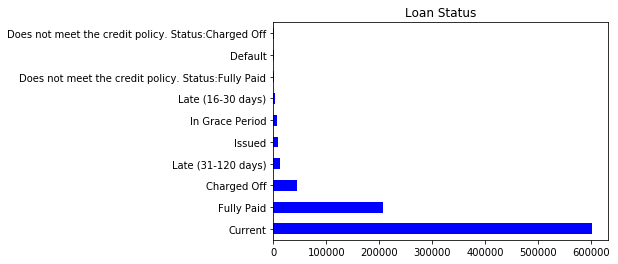

In [11]:
df1['loan_status'].value_counts().plot(kind= 'barh',color = 'blue', title = 'Loan Status')
plt.show()

In [12]:
loan_data = df1[(df1['loan_status'] == "Fully Paid") | (df1['loan_status'] == "Charged Off")]

In [13]:
loan_data.shape

(252971, 52)

In [14]:
loan_data.loan_status = loan_data.loan_status.astype('category').cat.codes

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
loan_data.loan_status.value_counts()

1    207723
0     45248
Name: loan_status, dtype: int64

## Data Processing and Data Cleaning

### id  and member_id
We can remove id and member_id as they will be of no use in prediction of loan status.

In [16]:
loan_data = loan_data.drop(["id", "member_id"], axis=1)

### loan_amnt : 
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


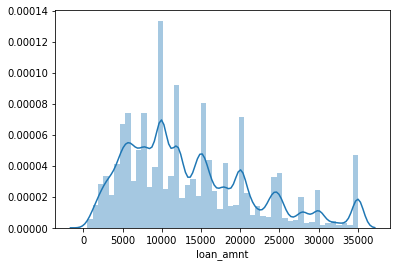

In [17]:
sns.distplot(loan_data["loan_amnt"])

### funded_amnt and funded_amnt_inv
funded_amnt: The total amount committed to that loan at that point in time. 
funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

In [18]:
loan_data.funded_amnt.describe()

count    252971.000000
mean      13522.193749
std        8109.211388
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18075.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [19]:
loan_data.funded_amnt_inv.describe()

count    252971.000000
mean      13429.174497
std        8127.682956
min           0.000000
25%        7200.000000
50%       11975.000000
75%       18000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64

In [20]:
np.corrcoef(loan_data.funded_amnt, loan_data.funded_amnt_inv)

array([[1.        , 0.99461173],
       [0.99461173, 1.        ]])

In [21]:
np.corrcoef(loan_data.funded_amnt_inv, loan_data.loan_amnt)

array([[1.        , 0.99174061],
       [0.99174061, 1.        ]])

In [22]:
loan_data[['funded_amnt','funded_amnt_inv','loan_amnt']].head()

,funded_amnt,funded_amnt_inv,loan_amnt
0,5000.0,4975.0,5000.0
1,2500.0,2500.0,2500.0
2,2400.0,2400.0,2400.0
3,10000.0,10000.0,10000.0
5,5000.0,5000.0,5000.0


Since, both funded_amnt and funded_amnt_inv are correlated with loan amount we will have to drop them. 

In [23]:
loan_data = loan_data.drop(["funded_amnt", "funded_amnt_inv"], axis=1)

### int_rate, grade and sub grade

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


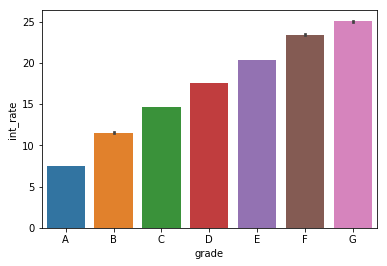

In [24]:
sns.barplot(x="grade", y="int_rate", data = loan_data, order= ["A","B","C","D","E","F","G"])

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


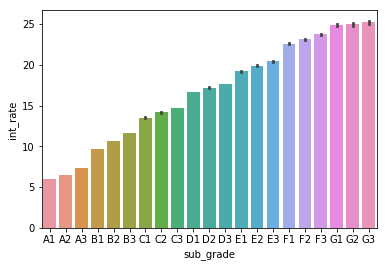

In [25]:
sns.barplot(x="sub_grade", y="int_rate" ,data = loan_data,order= ["A1","A2","A3","B1","B2","B3","C1","C2","C3","D1","D2","D3","E1","E2","E3","F1","F2","F3","G1","G2","G3",])

As we can see grade and sub-grade are given based on the int_rate so we can drop both of these variables.

In [26]:
loan_data = loan_data.drop(["grade","sub_grade"], axis = 1)

### emp_title
The job title supplied by the Borrower when applying for the loan.

In [27]:
loan_data.emp_title.value_counts()

Manager                                  1941
Teacher                                  1909
Supervisor                                852
Registered Nurse                          841
RN                                        841
Sales                                     677
Project Manager                           669
manager                                   579
Office Manager                            568
Driver                                    534
Director                                  501
Engineer                                  470
Owner                                     459
US Army                                   457
General Manager                           444
teacher                                   394
driver                                    380
Vice President                            380
Accountant                                355
Bank of America                           347
Operations Manager                        345
Administrative Assistant          

In [28]:
loan_data.emp_title.isna().sum()

13931

emp_title feature will be very hard to evaluate and it also has many NA values. So, dropping this feature for the sake of simplicity

In [29]:
loan_data = loan_data.drop("emp_title", axis= 1)

### zip_code
The first 3 numbers of the zip code provided by the borrower in the loan application.
The first 3 numbers do not tell us and we also have the state address in which a person lives. So, dropping this.

In [30]:
loan_data = loan_data.drop("zip_code", axis= 1)

### issue_d
When the loan was funded do not add value in our analysis. Also, it is a time series data and it will expand our model. So, better to remove it.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


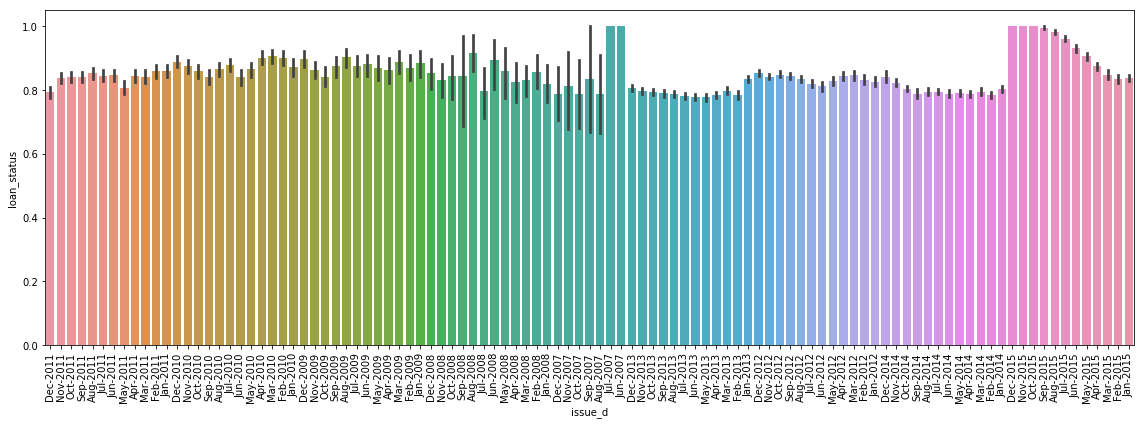

In [31]:
plt.figure(figsize=(16,6))
sns.barplot(x="issue_d", y="loan_status", data=loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [32]:
loan_data = loan_data.drop("issue_d", axis= 1)

### out_prncp, out_prncp_inv
Both of this are related to remaining outstanding principal. It is about the future so they are of no use.  

In [33]:
loan_data = loan_data.drop(["out_prncp","out_prncp_inv"], axis = 1)

### total_pymnt, total_pymnt_inv, total_rec_prncp
- total_pymnt: Payments received to date for total amount funded
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors
- total_rec_prncp: Principal received to date

In [34]:
np.corrcoef(loan_data.total_pymnt, loan_data.total_pymnt_inv)

array([[1.       , 0.9957378],
       [0.9957378, 1.       ]])

In [35]:
np.corrcoef(loan_data.total_pymnt, loan_data.total_rec_prncp)


array([[1.        , 0.97557076],
       [0.97557076, 1.        ]])

removing total_payment_inv and total_rec_prncp

In [36]:
loan_data = loan_data.drop(["total_pymnt_inv","total_rec_prncp"], axis = 1)

### total_rec_late_fee
Late fees received to date
This is considered in total payment and does not add value in our analysis so removing it.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


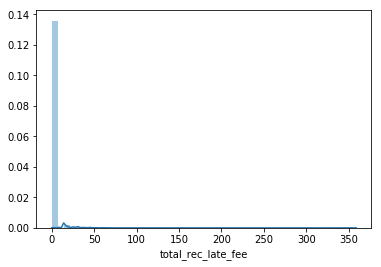

In [37]:
sns.distplot(loan_data.total_rec_late_fee)

In [38]:
loan_data = loan_data.drop("total_rec_late_fee", axis = 1)

### total_rec_int
Interest received to date
This is dependent on the loan duration and interest of the loan. So, droppig this to make model simpler.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


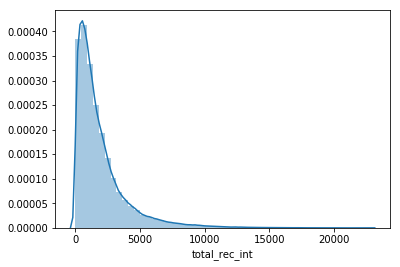

In [39]:
sns.distplot(loan_data.total_rec_int)

In [40]:
loan_data = loan_data.drop("total_rec_int", axis = 1)

### recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt
- recoveries, collection_recovery_fee,last_pymnt_amnt: These variables are not useful as they are included in total amount paid. 
- last_pymnt_d is not useful as it does not help predict the future status of the loan.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


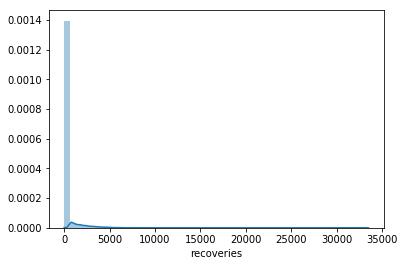

In [41]:
sns.distplot(loan_data.recoveries)

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


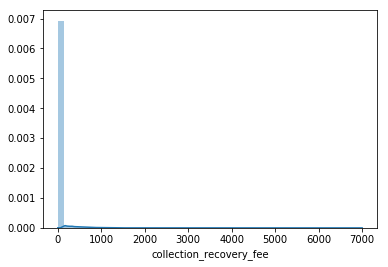

In [42]:
sns.distplot(loan_data.collection_recovery_fee)

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


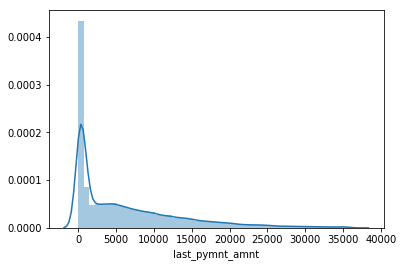

In [43]:
sns.distplot(loan_data.last_pymnt_amnt)

In [44]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [45]:
loan_data.shape

(252971, 33)

In [46]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

### url
we do not need url

In [47]:
loan_data = loan_data.drop("url", axis = 1)

### policy_code, application_type, pymnt_plan

In [48]:
loan_data.policy_code.value_counts()

1.0    252971
Name: policy_code, dtype: int64

In [49]:
loan_data.application_type.value_counts()

INDIVIDUAL    252970
JOINT              1
Name: application_type, dtype: int64

In [50]:
loan_data.pymnt_plan.value_counts()

n    252969
y         2
Name: pymnt_plan, dtype: int64

In [51]:
loan_data.shape[0]

252971

Since, all the values are in only one category, they will not help us.

In [52]:
loan_data = loan_data.drop(["policy_code", "application_type", "pymnt_plan"], axis = 1)

### initial_list_status

In [53]:
loan_data.initial_list_status.value_counts()

f    182079
w     70892
Name: initial_list_status, dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


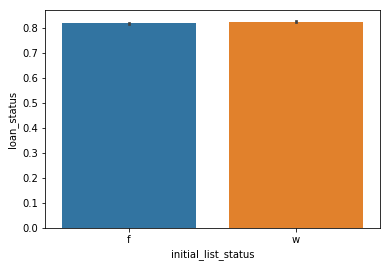

In [54]:
sns.barplot(x="initial_list_status", y="loan_status", data = loan_data)

As we can see, initial list status does not matter whether it is a whole or fractional. So, removing it.

In [55]:
loan_data = loan_data.drop("initial_list_status", axis = 1)

### last_credit_pull_d
Will have to remove it as it will expand our model 

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


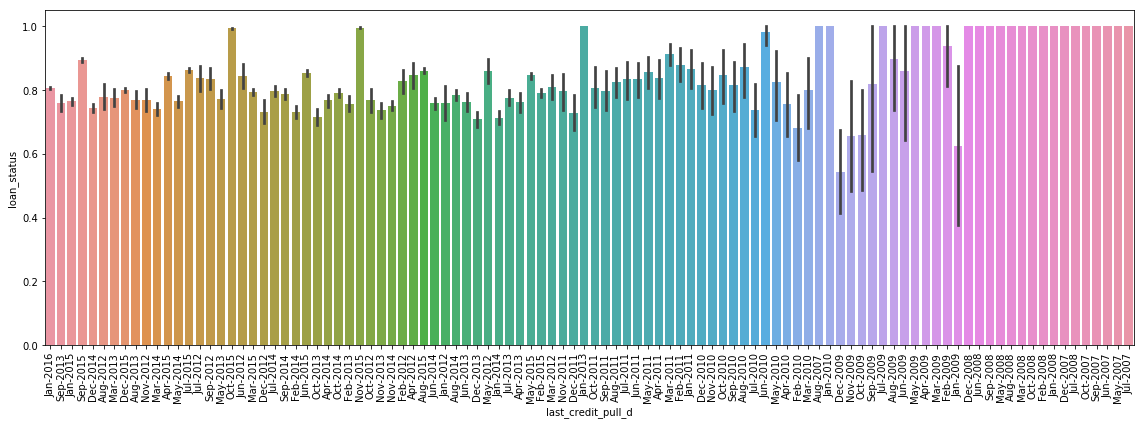

In [56]:
plt.figure(figsize=(16,6))
sns.barplot(x="last_credit_pull_d", y="loan_status", data=loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [57]:
loan_data = loan_data.drop("last_credit_pull_d", axis = 1)

### collections_12_mths_ex_med

In [58]:
loan_data.collections_12_mths_ex_med.value_counts()

0.0    251341
1.0      1466
2.0        96
3.0         8
4.0         2
5.0         1
6.0         1
Name: collections_12_mths_ex_med, dtype: int64

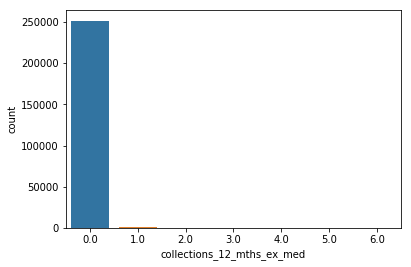

In [59]:
sns.countplot(loan_data.collections_12_mths_ex_med)

removing it as most of the values are 0.

In [60]:
loan_data = loan_data.drop("collections_12_mths_ex_med", axis = 1)

### purpose and title

In [61]:
loan_data.purpose.value_counts()

debt_consolidation    148363
credit_card            50076
home_improvement       14929
other                  14277
major_purchase          6265
small_business          4746
car                     3646
medical                 2854
moving                  2028
wedding                 1955
house                   1652
vacation                1588
educational              325
renewable_energy         267
Name: purpose, dtype: int64

In [62]:
loan_data.title.head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
Name: title, dtype: object

In [63]:
loan_data[["purpose","title"]].head(10)

,purpose,title
0,credit_card,Computer
1,car,bike
2,small_business,real estate business
3,other,personel
5,wedding,My wedding loan I promise to pay back
7,car,Car Downpayment
8,small_business,Expand Business & Buy Debt Portfolio
9,other,Building my credit history.
10,debt_consolidation,High intrest Consolidation
11,debt_consolidation,Consolidation


As we can see, purpose and title are similar and title seems to be an explanation. Purpose has all types of categories so let's drop title.

In [64]:
loan_data = loan_data.drop("title", axis =1)

### addr_state

In [65]:
loan_data.addr_state.value_counts()

CA    43110
NY    21338
TX    19343
FL    17545
NJ     9601
IL     9253
PA     8399
GA     8014
VA     7942
OH     7738
NC     6919
MA     6139
AZ     6077
MD     6007
MI     5996
WA     5915
CO     5613
MN     4460
MO     3954
NV     3809
CT     3681
OR     3353
AL     3147
WI     3078
LA     2952
SC     2818
IN     2800
TN     2426
KY     2268
OK     2131
UT     2112
KS     2083
AR     1754
HI     1478
NM     1377
NH     1148
WV     1137
RI     1087
DC      837
MT      736
DE      667
AK      663
WY      602
SD      544
VT      428
MS      421
NE       38
ME       13
ND        8
ID        6
IA        6
Name: addr_state, dtype: int64

As, there are somany categories we will have to drop this feature as it will increase variables if we encode them.

In [66]:
loan_data = loan_data.drop("addr_state", axis = 1)

### acc_now_delinq

In [67]:
loan_data.acc_now_delinq.value_counts()

0.0    252236
1.0       693
2.0        36
3.0         3
5.0         2
4.0         1
Name: acc_now_delinq, dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


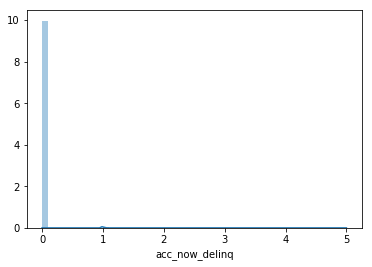

In [68]:
sns.distplot(loan_data.acc_now_delinq)

Removing it as most of the values are 0

In [69]:
loan_data= loan_data.drop("acc_now_delinq", axis=1)

### tot_cur_bal
Total current balance of all accounts

In [70]:
loan_data.tot_cur_bal.isna().sum()

63708

In [71]:
loan_data.tot_cur_bal.median()

81002.0

In [72]:
loan_data.tot_cur_bal.mean()

138331.1523277133

There is a big difference between mean and median so, we cannot impute and dropping it would be the best choice.

In [73]:
loan_data = loan_data.drop("tot_cur_bal", axis = 1 )

### tot_coll_amt
Total collection amounts ever owed

In [74]:
loan_data.tot_coll_amt.isna().sum()

63708

In [75]:
loan_data.tot_coll_amt.value_counts().head()/loan_data.shape[0]

0.0      0.662361
50.0     0.001380
100.0    0.001202
75.0     0.000933
150.0    0.000561
Name: tot_coll_amt, dtype: float64

Most of the values are 0 and there are many values not availabe. we should drop this feature.

In [76]:
loan_data = loan_data.drop("tot_coll_amt", axis = 1 )

### total_rev_hi_lim
Total revolving high credit/credit limit

In [77]:
loan_data.total_rev_hi_lim.isna().sum()

63708

In [78]:
loan_data.total_rev_hi_lim.mean()

29709.117397483926

In [79]:
loan_data.total_rev_hi_lim.median()

22300.0

In [80]:
loan_data.total_rev_hi_lim.fillna(loan_data.total_rev_hi_lim.median(), inplace=True)

In [81]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_rev_hi_lim'],
      dtype='object')

In [82]:
loan_data.shape

(252971, 21)

## Numerical features

In [83]:
num_cols = loan_data._get_numeric_data().columns
data = loan_data[num_cols]

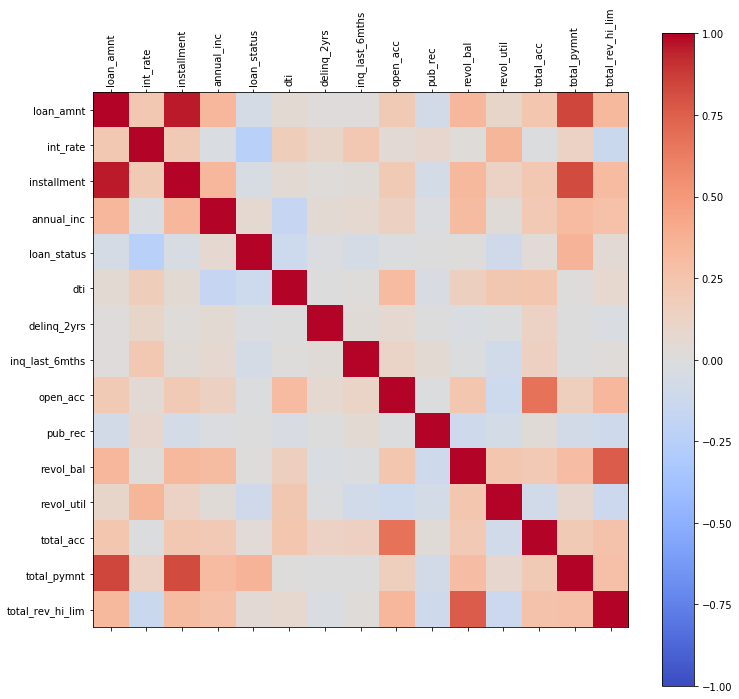

In [84]:
corr = data[num_cols].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

All features are important and we cannot drop any of them.

## Categorical features

In [85]:
loan_data.columns[loan_data.dtypes == object]

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'earliest_cr_line'],
      dtype='object')

### term

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


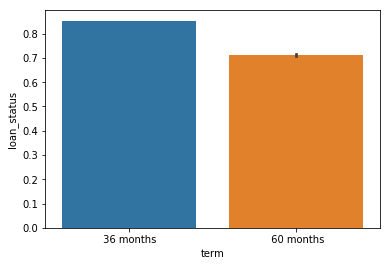

In [86]:
sns.barplot(x = "term", y = "loan_status", data = loan_data)

### emp_length              

In [87]:
loan_data.emp_length.value_counts()

10+ years    76881
2 years      23561
< 1 year     20886
3 years      20380
5 years      18059
1 year       16856
4 years      16197
6 years      14753
7 years      14085
8 years      11849
9 years       9567
Name: emp_length, dtype: int64

In [88]:
loan_data.emp_length.isna().sum()

9897

In [89]:
loan_data["emp_length"] = loan_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)

In [90]:
loan_data.emp_length.isna().sum()

9897

In [91]:
loan_data.fillna(0, inplace=True)

In [92]:
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x:int(x))

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


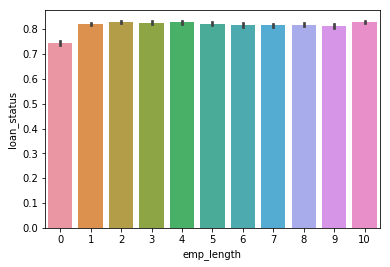

In [93]:
sns.barplot(x = "emp_length", y = "loan_status", data = loan_data)

### home_ownership          

In [94]:
loan_data.home_ownership.value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


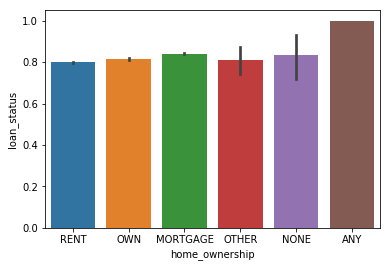

In [95]:
sns.barplot(x = "home_ownership", y = "loan_status", data = loan_data)

### verification_status

In [96]:
loan_data.verification_status.value_counts()

Verified           92896
Not Verified       86064
Source Verified    74011
Name: verification_status, dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


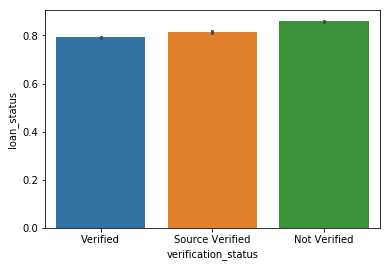

In [97]:
sns.barplot(x = "verification_status", y = "loan_status", data = loan_data)

### purpose

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


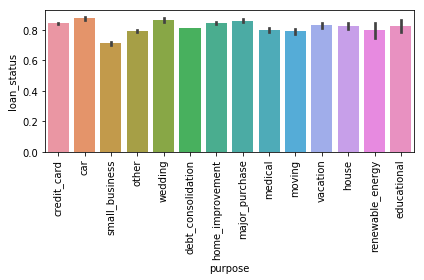

In [98]:
sns.barplot(x="purpose", y="loan_status", data=loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### earliest_cr_line
"The month the borrower's earliest reported credit line was opened"

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


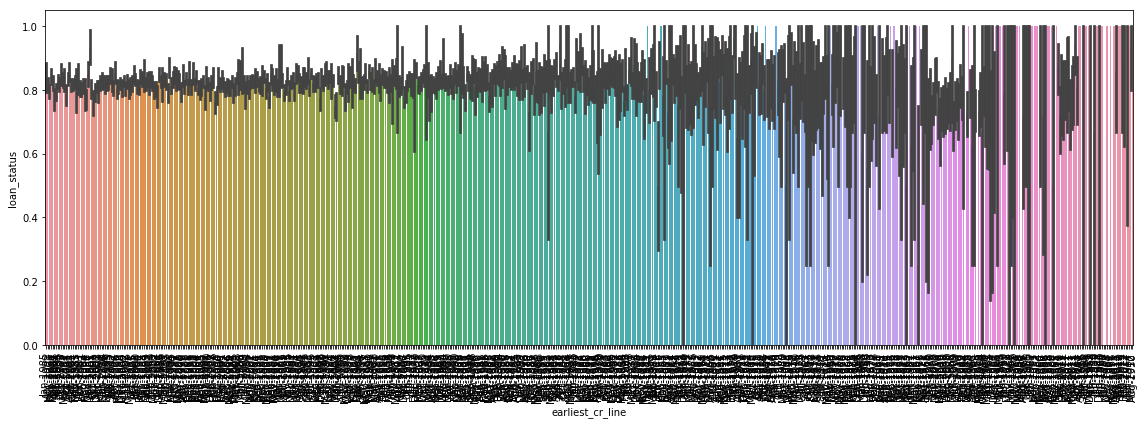

In [99]:
plt.figure(figsize=(16,6))
sns.barplot(x = "earliest_cr_line", y = "loan_status", data = loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

We will have to remove this fetaure as it will increase the complexity of our model.

In [100]:
loan_data = loan_data.drop("earliest_cr_line", axis = 1)

### Encoding 

In [101]:
categorical = ['term', 'home_ownership', 'verification_status', 'purpose']

In [102]:
loan_data = pd.get_dummies(loan_data, columns = categorical)

In [103]:
loan_data.dtypes

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
loan_status                               int8
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_rev_hi_lim                       float64
term_ 36 months                          uint8
term_ 60 months                          uint8
home_ownership_ANY                       uint8
home_ownership_MORTGAGE                  uint8
home_ownership_NONE                      uint8
home_ownershi

In [104]:
loan_data.isna().sum()

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_pymnt                            0
total_rev_hi_lim                       0
term_ 36 months                        0
term_ 60 months                        0
home_ownership_ANY                     0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_sta

## Train-Test Split

In [105]:
Y = loan_data.loan_status
X = loan_data.drop("loan_status", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y )

In [106]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (202376, 40)
Shape of y_train:  (202376,)
Shape of x_test:  (50595, 40)
Shape of y_test:  (50595,)


## Models

In [158]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    

### Over Sampling Using SMOTE

In [162]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_r, y_train_r = sm.fit_sample(x_train, y_train)

### Logistic Regression

In [187]:
log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(x_train_r, y_train_r)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=21,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [188]:
print_score(log_reg, x_train_r, y_train_r, x_test, y_test, train=False)

Test Result:

accuracy score: 0.9828

Classification Report: 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95      9050
          1       0.99      0.99      0.99     41545

avg / total       0.98      0.98      0.98     50595


Confusion Matrix: 
 [[ 8501   549]
 [  320 41225]]



(0.0, 2.0, 2.0, 0.0)

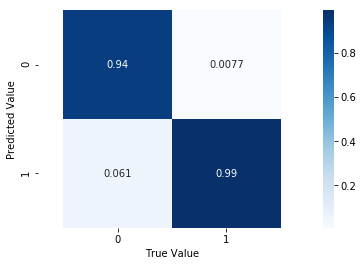

In [189]:
cm = confusion_matrix(y_test, log_reg.predict(x_test)).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

### Random Forest

In [165]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [166]:
print_score(clf_rf, x_train_r, y_train_r, x_test, y_test, train=False)

Test Result:

accuracy score: 0.9735

Classification Report: 
              precision    recall  f1-score   support

          0       0.97      0.88      0.92      9050
          1       0.97      0.99      0.98     41545

avg / total       0.97      0.97      0.97     50595


Confusion Matrix: 
 [[ 7938  1112]
 [  229 41316]]



(0.0, 2.0, 2.0, 0.0)

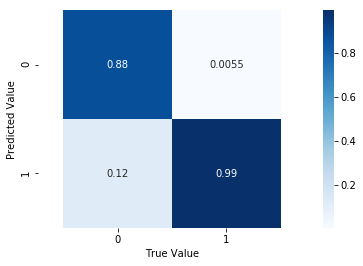

In [185]:
cm = confusion_matrix(y_test, clf_rf.predict(x_test)).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

In [199]:
len(loan_data.columns)

41

Text(0,0.5,'Normalized Gini Importance')

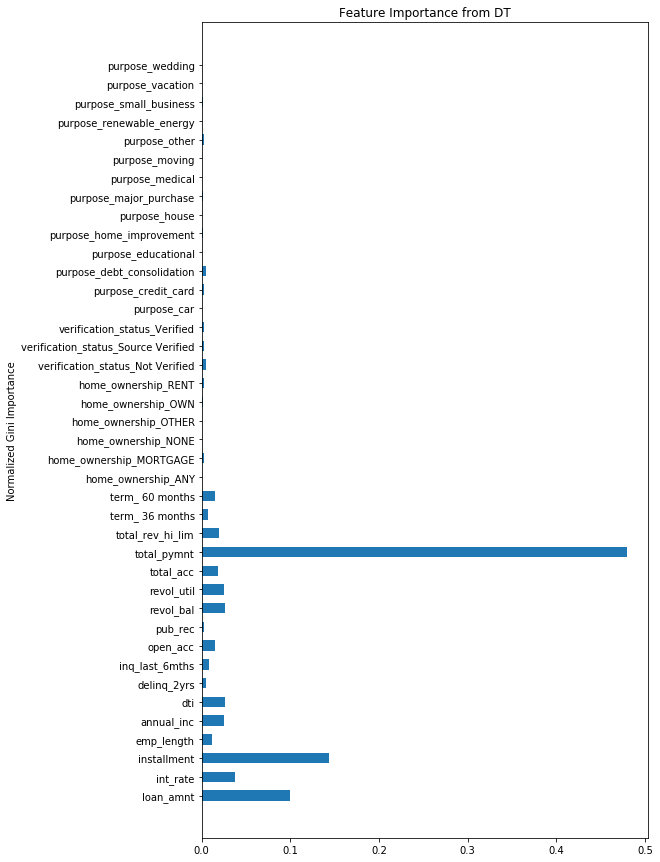

In [223]:
fig, ax = plt.subplots(figsize=(8,15))
width=0.55
ax.barh(np.arange(40), randomForest.feature_importances_, width)
ax.set_yticks(np.arange(len(randomForest.feature_importances_)))
ax.set_yticklabels(x_train.columns.values)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')


### LightGBM

In [177]:
def kfold_lightgbm(train_df, num_folds, stratified = False):
    print("Starting LightGBM. Train shape: {}".format(train_df.shape))
    
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = np.zeros(train_df.shape[0])

    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['loan_status']]
    
    # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['loan_status'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['loan_status'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['loan_status'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )

        # Fitting the model and evaluating by AUC
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
        print_score(clf, train_x, train_y, valid_x, valid_y, train=False)
        # Dataframe holding the different features and their importance
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    display_importances(feature_importance_df)
    return feature_importance_df

In [178]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(15, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')

Starting LightGBM. Train shape: (252971, 41)
Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.997111	training's binary_logloss: 0.0388155	valid_1's auc: 0.995023	valid_1's binary_logloss: 0.0462935
[2000]	training's auc: 0.997974	training's binary_logloss: 0.0332215	valid_1's auc: 0.995316	valid_1's binary_logloss: 0.0439584
[3000]	training's auc: 0.998445	training's binary_logloss: 0.0299454	valid_1's auc: 0.995367	valid_1's binary_logloss: 0.0434078
Early stopping, best iteration is:
[2875]	training's auc: 0.998398	training's binary_logloss: 0.0302972	valid_1's auc: 0.995368	valid_1's binary_logloss: 0.0434348
Test Result:



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


accuracy score: 0.9888



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


Classification Report: 
              precision    recall  f1-score   support

          0       0.99      0.95      0.97     15141
          1       0.99      1.00      0.99     69183

avg / total       0.99      0.99      0.99     84324




C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


Confusion Matrix: 
 [[14394   747]
 [  200 68983]]

Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.997094	training's binary_logloss: 0.0389676	valid_1's auc: 0.995121	valid_1's binary_logloss: 0.0449943
[2000]	training's auc: 0.998037	training's binary_logloss: 0.0330859	valid_1's auc: 0.995392	valid_1's binary_logloss: 0.042772
Early stopping, best iteration is:
[2256]	training's auc: 0.998172	training's binary_logloss: 0.0321604	valid_1's auc: 0.995414	valid_1's binary_logloss: 0.0425593
Test Result:



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


accuracy score: 0.9890



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


Classification Report: 
              precision    recall  f1-score   support

          0       0.99      0.95      0.97     15044
          1       0.99      1.00      0.99     69280

avg / total       0.99      0.99      0.99     84324




C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


Confusion Matrix: 
 [[14321   723]
 [  202 69078]]

Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.997212	training's binary_logloss: 0.038809	valid_1's auc: 0.994796	valid_1's binary_logloss: 0.0452509
Early stopping, best iteration is:
[1372]	training's auc: 0.997654	training's binary_logloss: 0.0360736	valid_1's auc: 0.994899	valid_1's binary_logloss: 0.0441171
Test Result:



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


accuracy score: 0.9889



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


Classification Report: 
              precision    recall  f1-score   support

          0       0.99      0.95      0.97     15063
          1       0.99      1.00      0.99     69260

avg / total       0.99      0.99      0.99     84323




C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


Confusion Matrix: 
 [[14319   744]
 [  188 69072]]



C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


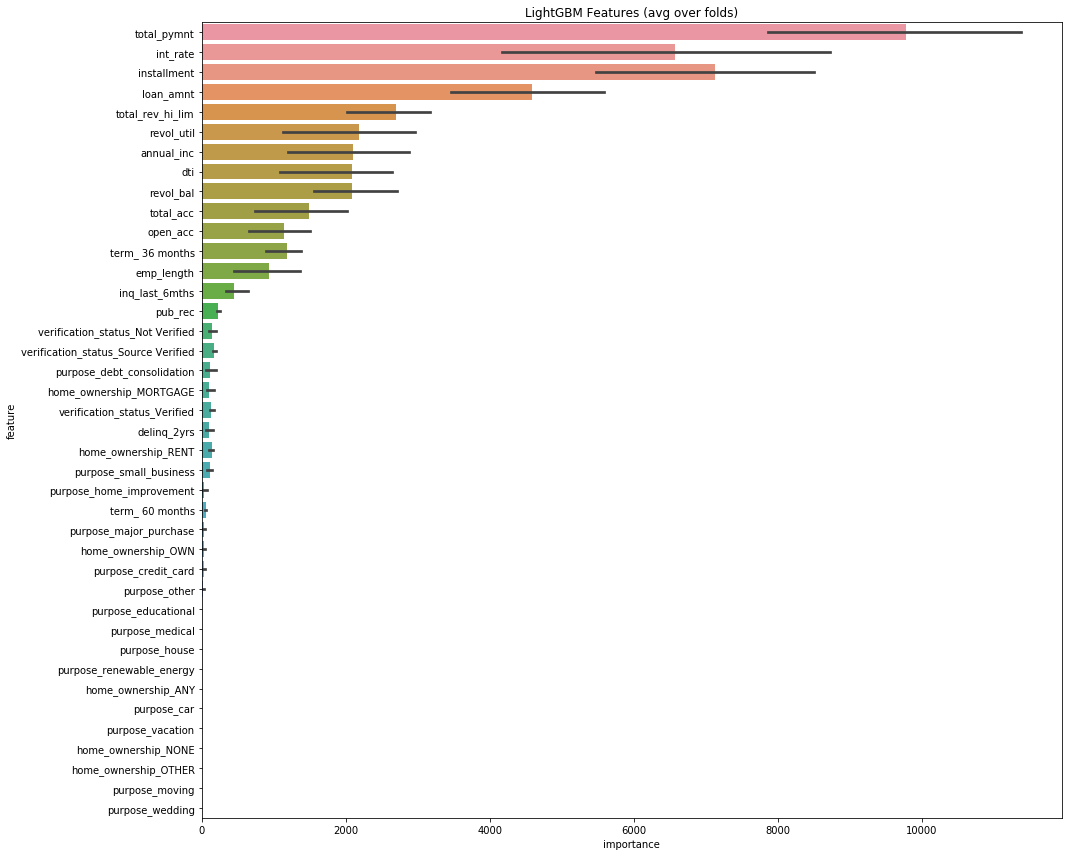

In [179]:
feat_importance = kfold_lightgbm(loan_data, num_folds= 3, stratified= False)